# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
df = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz', sep='\t')
df.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,target
116,5.8,4.0,1.2,0.2,0
133,4.6,3.2,1.4,0.2,0
28,5.7,3.8,1.7,0.3,0
19,5.8,2.7,5.1,1.9,2
117,4.6,3.1,1.5,0.2,0
72,5.1,3.8,1.6,0.2,0
148,5.0,3.6,1.4,0.2,0
59,4.4,3.0,1.3,0.2,0
63,7.4,2.8,6.1,1.9,2
103,5.4,3.7,1.5,0.2,0


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
cols = list(df.columns)
col_descriptions = [
   "sepal-length represents the length of the flower's sepal, a part of a flower that provides protection and supports the petals",
   "sepal-width represents the width of the flower's sepal, a part of a flower that provides protection and supports the petals",
   "petal-length represents the length of the flower's petal, a typically bright colored part of a flower that surrounds the reproductive parts of the flower",
   "petal-width represents the width of the flower's petal, a typically bright colored part of a flower that surrounds the reproductive parts of the flower",
   "target represents the species of a flower, encoded as an integer"
]
for c, d in zip(cols, col_descriptions, strict=True):
    print(f"column: {c}, description: {d}\n")

column: sepal-length, description: sepal-length represents the length of the flower's sepal, a part of a flower that provides protection and supports the petals

column: sepal-width, description: sepal-width represents the width of the flower's sepal, a part of a flower that provides protection and supports the petals

column: petal-length, description: petal-length represents the length of the flower's petal, a typically bright colored part of a flower that surrounds the reproductive parts of the flower

column: petal-width, description: petal-width represents the width of the flower's petal, a typically bright colored part of a flower that surrounds the reproductive parts of the flower

column: target, description: target represents the species of a flower, encoded as an integer



### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

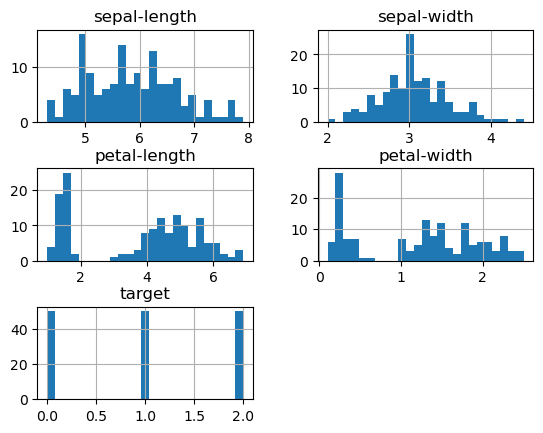

In [5]:
_ = df.hist(bins=25)
plt.subplots_adjust(hspace=.5)

In [6]:
df.skew()

sepal-length    0.314911
sepal-width     0.334053
petal-length   -0.274464
petal-width    -0.104997
target          0.000000
dtype: float64

sepal-length: Positive/Right skewed unimodal distribution

sepal-width: Positive/Right skewed unimodal distribution

petal-length: Negative/left skewed multimodal distribution with peaks around 1 and 5

petal-width: Negative/left skewed multimodal distribution with a large peak around .2 and smaller peaks around roughly 1.5 and 2

target: Uniform distribution with 3 values

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

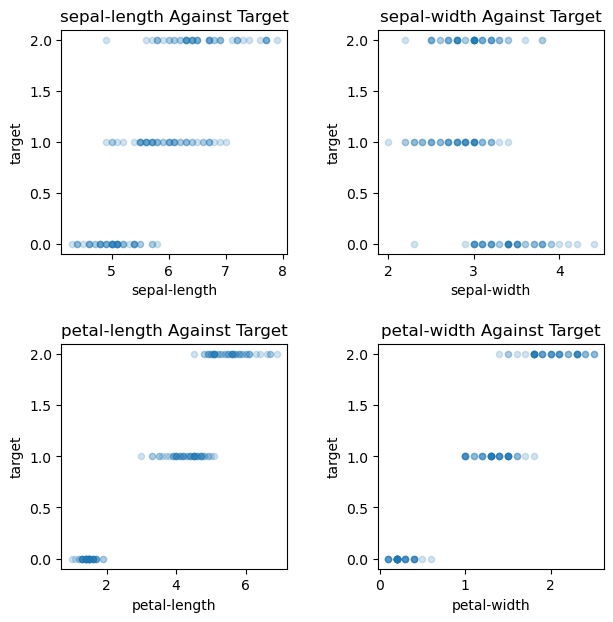

In [7]:
plot_columns = [c for c in df.columns if c != "target"]
num_cols = 2
num_rows = (len(plot_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
for (i, c) in enumerate(plot_columns):
    plt.subplot(num_rows, num_cols, i+1)
    df.plot.scatter(c, "target", alpha=.2, ax=plt.gca())
    plt.xlabel(c)
    plt.ylabel("target")
    plt.title(f"{c} Against Target")
plt.subplots_adjust(wspace=.4, hspace=.4)

sepal-length and the target are dependent. We can see a clear separation of the target; sepal-lengths between approximately 4-6 correspond to target 0, between 5-7 to target 1, between 5.5-8 to target 2.

sepal-width and the target are dependent. We can see a clear separation of the target; sepal-width between approximately 3-4.5 correspond to target 0, between 2-3.5 to target 1, between 2.5-3.5 to target 2. There is more overlap in this combination than others, suggesting the relationship is not as strong

petal-length and the target are dependent. We can see a clear separation of the target; petal-lengths between approximately 1-2 correspond to target 0, between 3.5-5 to target 1, between 5-7 to target 2. This combination has the strongest separation of the target

petal-width and the target are dependent. We can see a clear separation of the target; petal-widths between approximately 0-.5 correspond to target 0, between 1-2 to target 1, between 1.5-2.5 to target 2.

In summary, all 4 input features are dependent with the target

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [8]:
lin_reg = sklearn.linear_model.LinearRegression()
X = df.drop("target", axis=1)
y = df["target"]
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

In [9]:
mse = sklearn.metrics.mean_squared_error(y_true=y, y_pred=y_pred)
mse

0.046385088311226945

The MSE of the model over the whole data set is 0.046385088311226945

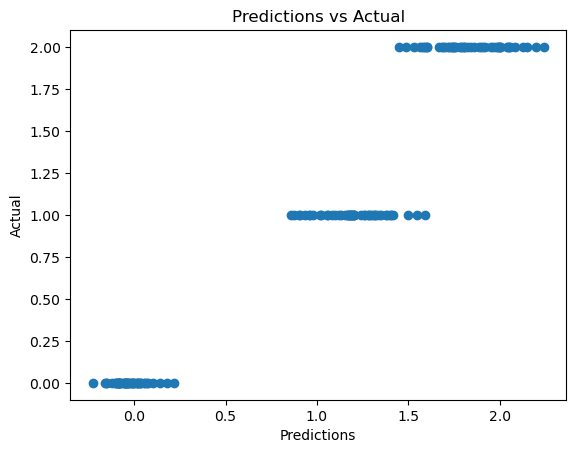

In [10]:
plt.scatter(y_pred, y)
plt.title("Predictions vs Actual")
plt.xlabel("Predictions")
plt.ylabel("Actual")
None

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


Linear Regression built on feature sepal-length Mean Squared Error: 0.2583986123119253
Linear Regression built on feature sepal-width Mean Squared Error: 0.5493765900582834
Linear Regression built on feature petal-length Mean Squared Error: 0.06621216537347081
Linear Regression built on feature petal-width Mean Squared Error: 0.05678463583919234


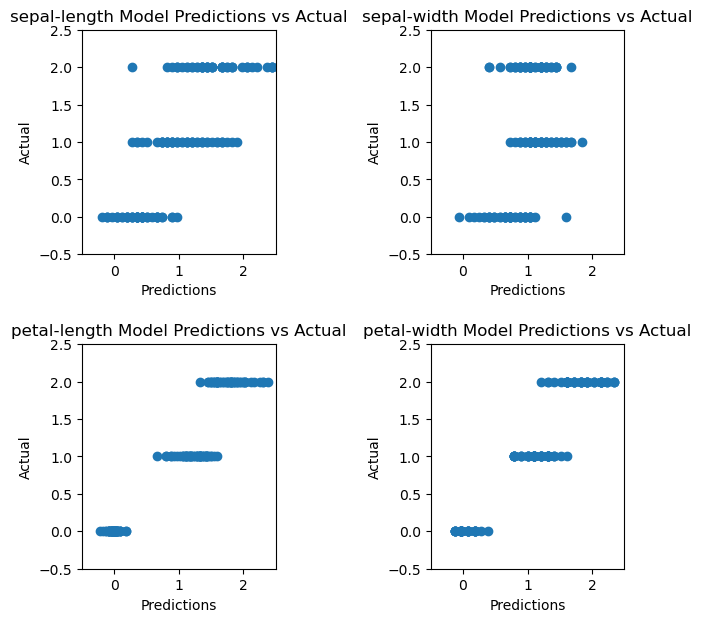

In [11]:
num_cols = 2
num_rows = (len(plot_columns) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols*3.5, num_rows*3.5))

for (i, c) in enumerate(X.columns):
    single_feature_df = pd.DataFrame(df[c])
    lin_reg = sklearn.linear_model.LinearRegression()
    lin_reg.fit(single_feature_df, y)
    y_pred = lin_reg.predict(single_feature_df)
    mse = sklearn.metrics.mean_squared_error(y_true=y, y_pred=y_pred)
    print(f"Linear Regression built on feature {c} Mean Squared Error: {mse}")

    plt.subplot(num_rows, num_cols, i+1)
    plt.scatter(y_pred, y)
    plt.xlabel("Predictions")
    plt.ylabel("Actual")
    plt.title(f"{c} Model Predictions vs Actual")
    plt.xlim(-.5,2.5)
    plt.ylim(-.5,2.5)
plt.subplots_adjust(wspace=.8, hspace=.4)

The petal-width model performed the closest to the model trained on all features:

Model trained with only petal-width on entire dataset: 0.05678463583919234 MSE

Model trained with all features on entire dataset: 0.046385088311226945 MSE

This shows that the petal width is the best predictor of the target, though does not explain all of the variability. When incorporating the other features, the performance sees a lift

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

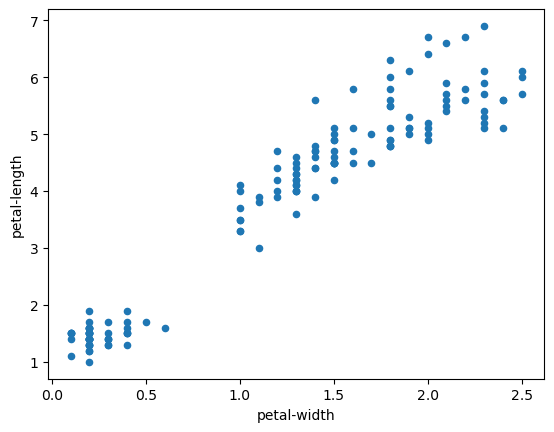

In [12]:
_ = df.plot.scatter("petal-width", "petal-length")

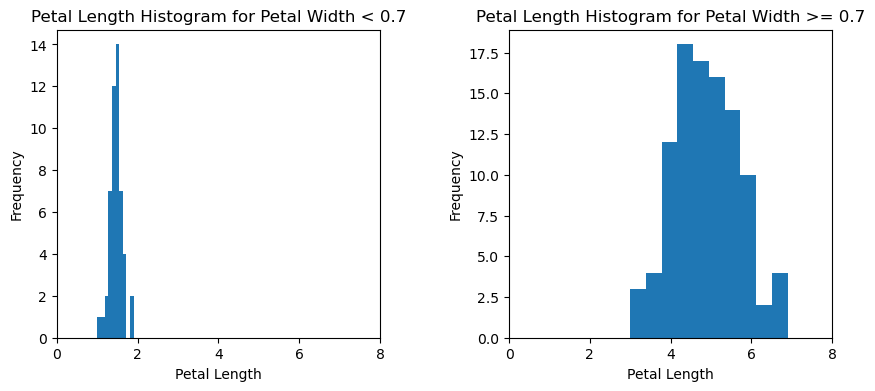

In [13]:
# Lets choose threshold .7 since it is where the data splits
threshold = .7
below_threshold_df = df[df['petal-width'] < .7]
above_threshold_df = df[df['petal-width'] >= .7]

num_cols = 2
num_rows = 1
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(below_threshold_df['petal-length'])
plt.title("Petal Length Histogram for Petal Width < 0.7")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.xlim(0,8)

plt.subplot(1, 2, 2)
plt.hist(above_threshold_df['petal-length'])
plt.title("Petal Length Histogram for Petal Width >= 0.7")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.xlim(0,8)

plt.subplots_adjust(wspace=.4)

We can see in the two histograms that the threshold of 0.7 creates a clear separation in the values of Petal Length.

For Petal Width < 0.7, we see Petal Lengths range from around 1 to 2

For Petal Width >= 0.7, we see Petal Lengths range from around 3 to 7

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

#### PCA Analysis

##### Fitting PCA Model

In [38]:
pca_pipe = make_pipeline(StandardScaler(), PCA(random_state=42))
pca_pipe.fit(X, y)

,steps,"[('standardscaler', ...), ('pca', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'


In [39]:
pca = pca_pipe.steps[1][1]

##### PCA Components

In [40]:
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)
pca_components_df

,sepal-length,sepal-width,petal-length,petal-width
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416
2,0.721017,-0.242033,-0.140892,-0.633801
3,-0.261996,0.124135,0.801154,-0.523546


##### PCA Explained Variance

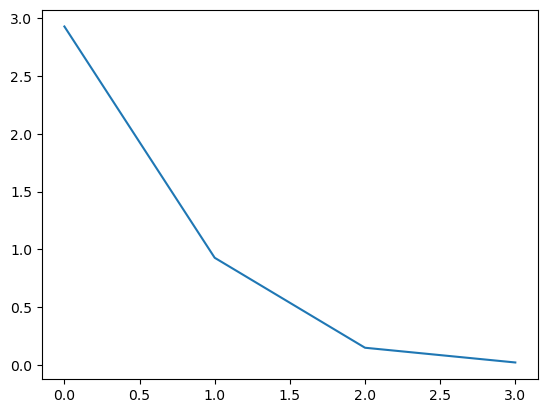

In [18]:
_ = plt.plot(pca.explained_variance_)

In [19]:
pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

##### Projecting the Normalized PCA

In [41]:
color_map = {
    0: "blue",
    1: "red",
    2: "green",
}
df_normalized = df[X.columns] / df[X.columns].std()
df_normalized.std()

sepal-length    1.0
sepal-width     1.0
petal-length    1.0
petal-width     1.0
dtype: float64

In [44]:
df_projected = df_normalized[X.columns] @ pca_components_df.iloc[:2].T

##### Plotting the Normalized PCA

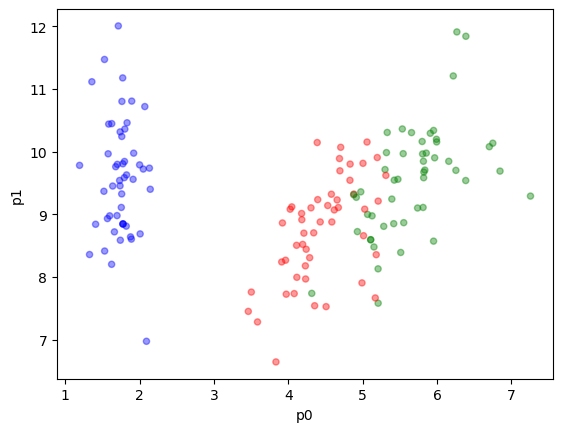

In [45]:
df_projected.plot.scatter(0, 1, alpha=.4, color=df['target'].map(color_map))
plt.xlabel("p0")
plt.ylabel("p1")
None

##### Fitting PCA Model on first 2 components

In [24]:
pca_reg_pipe = make_pipeline(StandardScaler(), PCA(random_state=42, n_components=2), LinearRegression())
pca_reg_pipe.fit(X, y)

,steps,"[('standardscaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'


In [25]:
pca_first_half = pca_reg_pipe.steps[1][1]
pca_first_half

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


In [26]:
pca_first_half.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [27]:
sum(pca_first_half.explained_variance_ratio_)

np.float64(0.9580097536148198)

The variance explained by the first half of the principal components is 0.9580097536148198

In [28]:
y_pred = pca_reg_pipe.predict(X)
sklearn.metrics.mean_squared_error(y_pred, y)

0.07146725091639042

The Mean Squared Error of the Linear Regression model is 0.07146725091639042

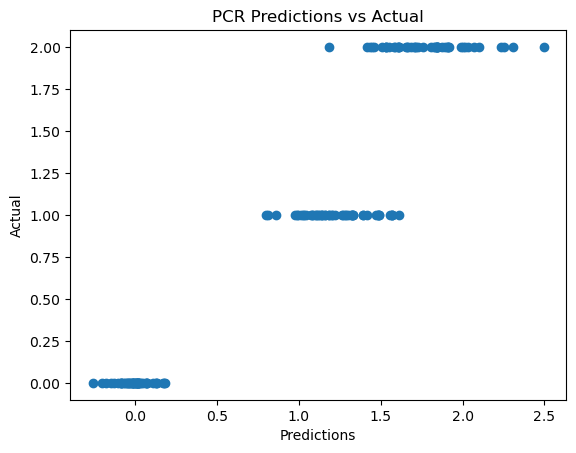

In [29]:
plt.scatter(y_pred, y)
plt.title("PCR Predictions vs Actual")
plt.xlabel("Predictions")
plt.ylabel("Actual")
None

The MSE of the Linear Regression trained on the whole dataset after applying the StandardScaler and PCA with 2 components is 0.07146725091639042

In comparison:

The Linear Regression trained on the whole dataset with only the petal-width feature with no scaling applied: 0.05678463583919234 MSE

The Linear Regression trained with all features on entire dataset with no scaling applied: 0.046385088311226945 MSE

This result shows that the StandardScaler and PCA with 2 components did not perform as well as only applying LinearRegression. My hypothesis is that this is due to limiting the number of components.

In a final test, I trained a similar model, applying StandardScaler, PCA (with all components), and a LinearRegression. This model resulted in 0.046385088311226945 MSE, perfectly matching the LinearRegression trained with all features with no scaling or PCA. This proves that the number of components has a direct relation to the resulting MSE of the LinearRegression. This is likely because some dimensionality is lost when reducing the number of components to only the first half.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [30]:
corr = df.corr(numeric_only=True)
corr

,sepal-length,sepal-width,petal-length,petal-width,target
sepal-length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal-width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal-length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal-width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


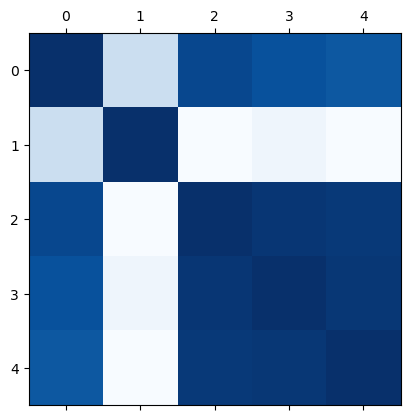

In [31]:
_ = plt.matshow(corr, cmap="Blues")

We can see that the highest correlation is between petal-length and petal-width, with 0.962757. 

This correlation is close to 1, indicating that it is a very strong correlation. During PCA, these correlated feature can be mostly captured in a single component.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

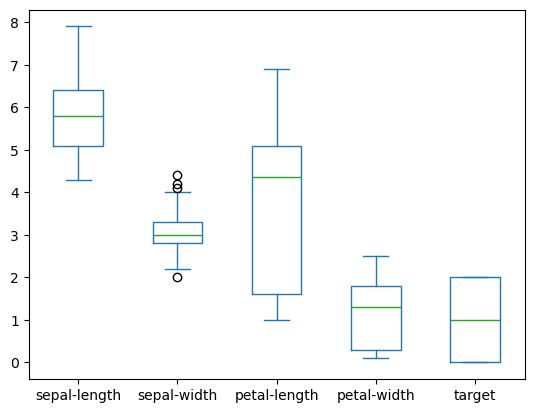

In [32]:
_ = df.plot.box()

In [33]:
pd.set_option('display.max_column', None)
df.groupby("target").describe()

sepal-length                                             sepal-width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

                                                     petal-length         \
         mean       std  min    25%  50%    75%  max        count   mean   
target                                                                     
0       3.418  0.381024  2.3  3.125  3.4  3.675  4.4         50.0  1.464   
1       2.770  0.313798  2.0  2.525  2.8  3.000  3.4         50.0  4.260   
2       2.974  0.322497  2.2  2.800  3.0  3.175  3.8         50.0  5.552   

                                             petal-width                   \
             std  min  25%   50%    75%  max       count   mean       std   
target                                                                      
0       0.173511  1.0  1.4  1.50  1.575  1.9        50.0  0.244  0.107210   
1       0.469911  3.0  4.0  4.35  4.600  5.1        50.0  1.326  0.197753   
2       0.551895  4.5  5.1  5.55  5.875  6.9        50.0  2.026  0.274650   

                                 
        min  25%  50%  75%  max  
target                           
0       0.1  0.2  0.2  0.3  0.6  
1       1.0  1.2  1.3  1.5  1.8  
2       1.4  1.8  2.0  2.3  2.5

In [34]:
df[df['sepal-width'] > 4]

,sepal-length,sepal-width,petal-length,petal-width,target
29,5.5,4.2,1.4,0.2,0
88,5.2,4.1,1.5,0.1,0
118,5.7,4.4,1.5,0.4,0


In [35]:
# Instance 118 is an outlier row
df.loc[118]

sepal-length    5.7
sepal-width     4.4
petal-length    1.5
petal-width     0.4
target          0.0
Name: 118, dtype: float64

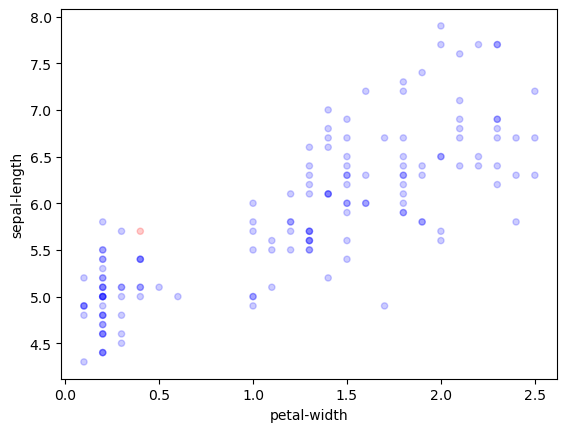

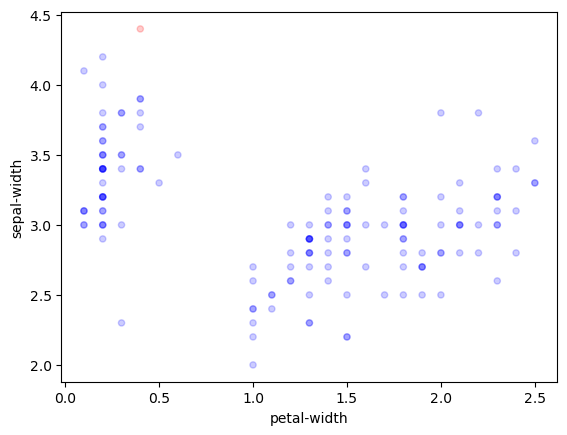

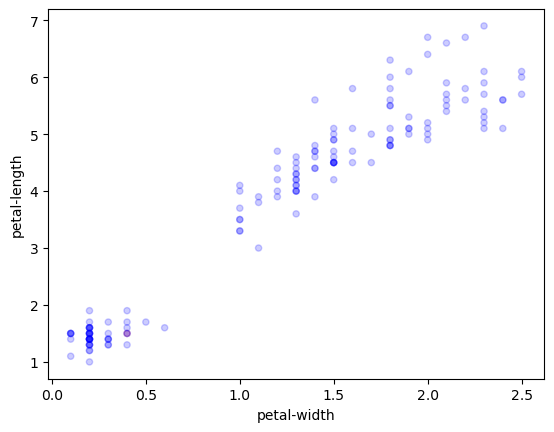

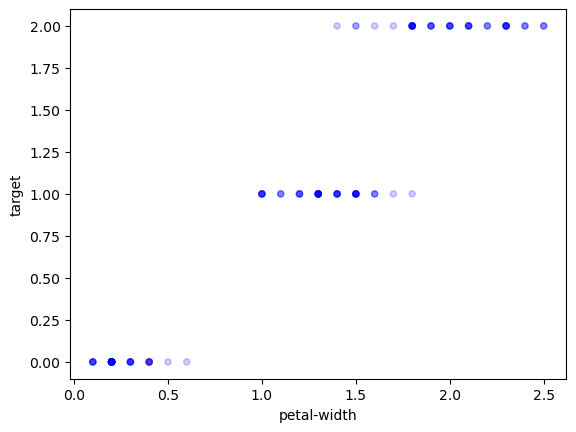

In [36]:
colors = ['blue'] * len(df)
colors[118] = 'red'
for c in df.columns:
    if c != "petal-width":
        df.plot.scatter("petal-width", c, c=colors, alpha=.2)

In [37]:
# TODO try use z score or IQR to find outlier row

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

None